## CNN+LSTM

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 8, 1)]               0         []                            
                                                                                                  
 conv1d_2 (Conv1D)           (None, 6, 128)               512       ['input_2[0][0]']             
                                                                                                  
 max_pooling1d_2 (MaxPoolin  (None, 5, 128)               0         ['conv1d_2[0][0]']            
 g1D)                                                                                             
                                                                                                  
 conv1d_3 (Conv1D)           (None, 3, 64)                24640     ['max_pooling1d_2[0][0]'

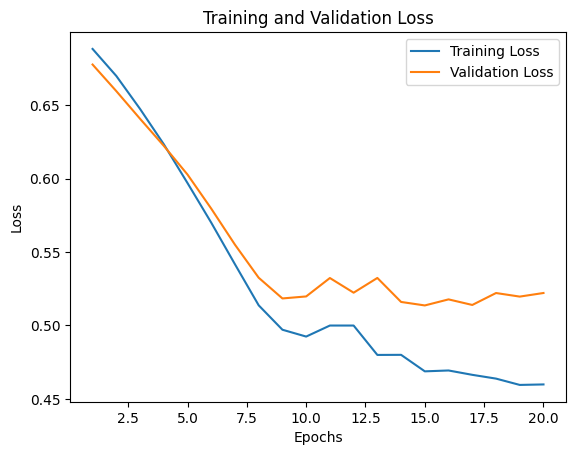

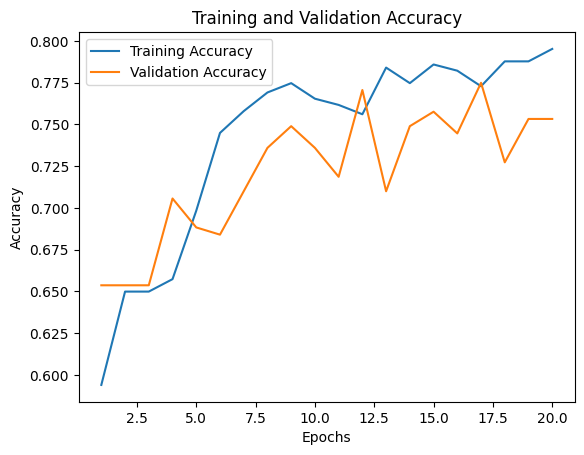

8/8 [==============================] - 1s 6ms/step


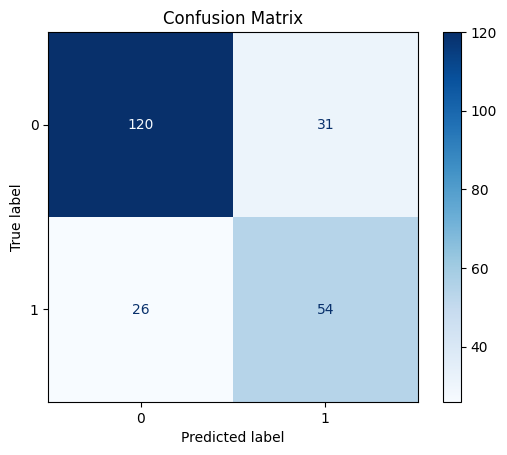

Classification Report:
              precision    recall  f1-score   support

Non-Diabetic       0.82      0.79      0.81       151
    Diabetic       0.64      0.68      0.65        80

    accuracy                           0.75       231
   macro avg       0.73      0.73      0.73       231
weighted avg       0.76      0.75      0.75       231



In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, LSTM, Dense, Flatten, Dropout, concatenate
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

optimizer = Adam(learning_rate=0.0001)

# Veri setini yükleme
column_names = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age", "Outcome"]
data = pd.read_csv(r"diabetes.csv", names=column_names, header=0)

# Özellikler ve etiketleri ayırma
X = data.drop("Outcome", axis=1)
y = data["Outcome"]

# Veriyi eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Veriyi standartlaştırma
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Giriş katmanı
inputs = Input(shape=(X_train_scaled.shape[1], 1))

# Conv1D + MaxPooling1D katmanları
conv1 = Conv1D(128, kernel_size=3, activation='relu')(inputs)
pool1 = MaxPooling1D(pool_size=2, strides=1)(conv1)
conv2 = Conv1D(64, kernel_size=3, activation='relu')(pool1)
pool2 = MaxPooling1D(pool_size=2, strides=1)(conv2)

# Paralel LSTM katmanları
lstm1 = LSTM(64, return_sequences=True)(pool2)
lstm2 = LSTM(64, return_sequences=True)(pool2)
lstm3 = LSTM(64, return_sequences=True)(pool2)

# LSTM çıkışlarını birleştirme
merged_layer = concatenate([lstm1, lstm2, lstm3], axis=-1)

flattened = Flatten()(merged_layer)

# Tam bağlantı katmanları
dense1 = Dense(1024, activation='relu')(flattened)
dropout1 = Dropout(0.5)(dense1)
dense2 = Dense(512, activation='relu')(dropout1)

# Çıkış katmanı
output = Dense(2, activation='softmax')(dense2)

# Modeli oluşturma
model = Model(inputs=inputs, outputs=output)

# Modeli derleme
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Modeli özetleme
model.summary()

# Veri şeklini yeniden düzenleme
X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

# Modeli eğitme
history = model.fit(X_train_reshaped, y_train, epochs=20, batch_size=64, validation_data=(X_test_reshaped, y_test))

# Model performansını değerlendirme
loss, accuracy = model.evaluate(X_test_reshaped, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

# Modelin loss ve accuracy değerlerini alma
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Loss grafiği
plt.plot(range(1, len(train_loss) + 1), train_loss, label='Training Loss')
plt.plot(range(1, len(val_loss) + 1), val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Accuracy grafiği
plt.plot(range(1, len(train_acc) + 1), train_acc, label='Training Accuracy')
plt.plot(range(1, len(val_acc) + 1), val_acc, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

# En iyi modelin karmaşıklık matrisini çizme
y_pred = model.predict(X_test_reshaped)
y_pred_classes = np.argmax(y_pred, axis=1)
cm = confusion_matrix(y_test, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

# Sınıflandırma raporunu yazdırma
report = classification_report(y_test, y_pred_classes, target_names=["Non-Diabetic", "Diabetic"])
print("Classification Report:")
print(report)


## CNN

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 8, 1)]            0         
                                                                 
 conv1d_4 (Conv1D)           (None, 6, 128)            512       
                                                                 
 max_pooling1d_4 (MaxPoolin  (None, 5, 128)            0         
 g1D)                                                            
                                                                 
 conv1d_5 (Conv1D)           (None, 3, 64)             24640     
                                                                 
 max_pooling1d_5 (MaxPoolin  (None, 2, 64)             0         
 g1D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 128)               0   

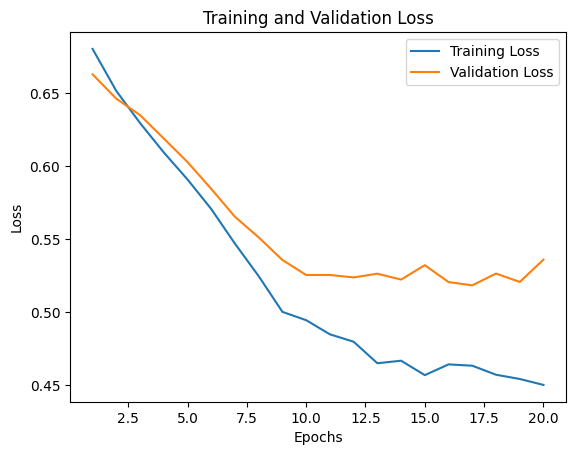

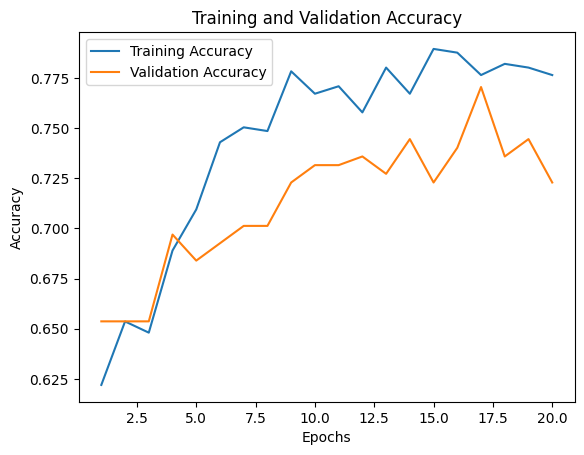

8/8 [==============================] - 0s 3ms/step


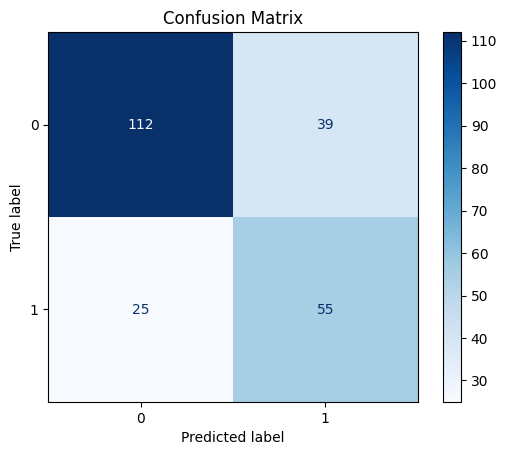

Classification Report:
              precision    recall  f1-score   support

Non-Diabetic       0.82      0.74      0.78       151
    Diabetic       0.59      0.69      0.63        80

    accuracy                           0.72       231
   macro avg       0.70      0.71      0.70       231
weighted avg       0.74      0.72      0.73       231



In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, LSTM, Dense, Flatten, Dropout, concatenate
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

optimizer = Adam(learning_rate=0.0001)

# Veri setini yükleme
column_names = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age", "Outcome"]
data = pd.read_csv(r"diabetes.csv", names=column_names, header=0)

# Özellikler ve etiketleri ayırma
X = data.drop("Outcome", axis=1)
y = data["Outcome"]

# Veriyi eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Veriyi standartlaştırma
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Giriş katmanı
inputs = Input(shape=(X_train_scaled.shape[1], 1))

# Conv1D + MaxPooling1D katmanları
conv1 = Conv1D(128, kernel_size=3, activation='relu')(inputs)
pool1 = MaxPooling1D(pool_size=2, strides=1)(conv1)
conv2 = Conv1D(64, kernel_size=3, activation='relu')(pool1)
pool2 = MaxPooling1D(pool_size=2, strides=1)(conv2)

flattened = Flatten()(pool2)

# Tam bağlantı katmanları
dense1 = Dense(1024, activation='relu')(flattened)
dropout1 = Dropout(0.5)(dense1)
dense2 = Dense(512, activation='relu')(dropout1)

# Çıkış katmanı
output = Dense(2, activation='softmax')(dense2)

# Modeli oluşturma
model = Model(inputs=inputs, outputs=output)

# Modeli derleme
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Modeli özetleme
model.summary()

# Veri şeklini yeniden düzenleme
X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

# Modeli eğitme
history = model.fit(X_train_reshaped, y_train, epochs=20, batch_size=64, validation_data=(X_test_reshaped, y_test))

# Model performansını değerlendirme
loss, accuracy = model.evaluate(X_test_reshaped, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

# Modelin loss ve accuracy değerlerini alma
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Loss grafiği
plt.plot(range(1, len(train_loss) + 1), train_loss, label='Training Loss')
plt.plot(range(1, len(val_loss) + 1), val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Accuracy grafiği
plt.plot(range(1, len(train_acc) + 1), train_acc, label='Training Accuracy')
plt.plot(range(1, len(val_acc) + 1), val_acc, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

# En iyi modelin karmaşıklık matrisini çizme
y_pred = model.predict(X_test_reshaped)
y_pred_classes = np.argmax(y_pred, axis=1)
cm = confusion_matrix(y_test, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

# Sınıflandırma raporunu yazdırma
report = classification_report(y_test, y_pred_classes, target_names=["Non-Diabetic", "Diabetic"])
print("Classification Report:")
print(report)


## LSTM

Epoch 1/20
9/9 [==============================] - 7s 140ms/step - loss: 0.6560 - accuracy: 0.7039 - val_loss: 0.6235 - val_accuracy: 0.6840
Epoch 2/20
9/9 [==============================] - 0s 27ms/step - loss: 0.5841 - accuracy: 0.7318 - val_loss: 0.5729 - val_accuracy: 0.7056
Epoch 3/20
9/9 [==============================] - 0s 26ms/step - loss: 0.5428 - accuracy: 0.7318 - val_loss: 0.5773 - val_accuracy: 0.7143
Epoch 4/20
9/9 [==============================] - 0s 20ms/step - loss: 0.5522 - accuracy: 0.7318 - val_loss: 0.5688 - val_accuracy: 0.7100
Epoch 5/20
9/9 [==============================] - 0s 18ms/step - loss: 0.5459 - accuracy: 0.7318 - val_loss: 0.5646 - val_accuracy: 0.7100
Epoch 6/20
9/9 [==============================] - 0s 18ms/step - loss: 0.5467 - accuracy: 0.7300 - val_loss: 0.5619 - val_accuracy: 0.7229
Epoch 7/20
9/9 [==============================] - 0s 18ms/step - loss: 0.5466 - accuracy: 0.7300 - val_loss: 0.5654 - val_accuracy: 0.7143
Epoch 8/20
9/9 [==========

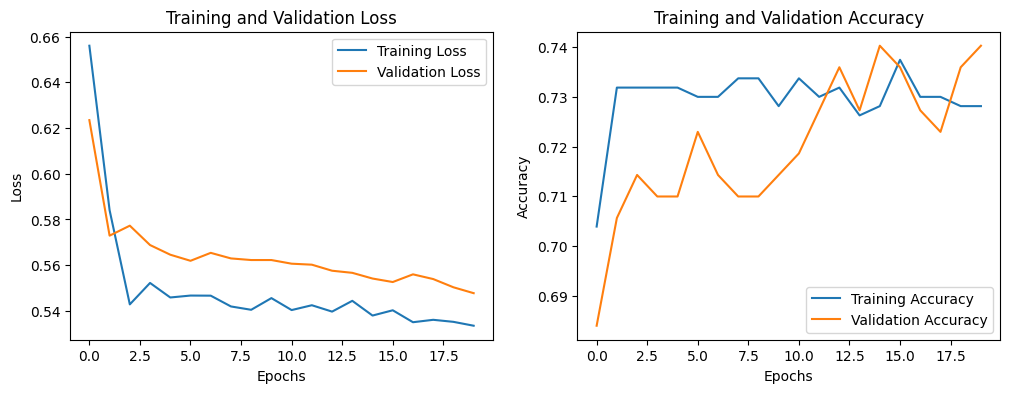

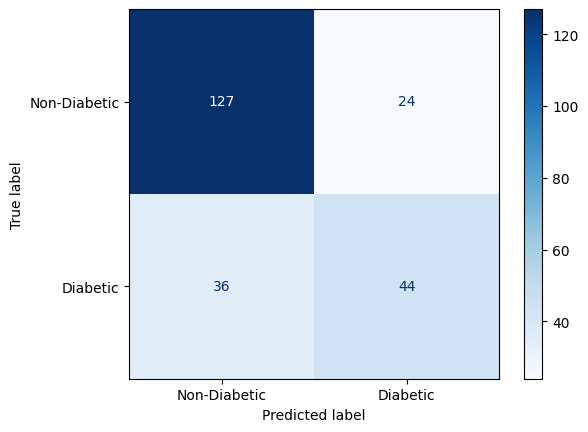

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt

# Veri kümesini yükleme (Örneğin: diabetes.csv)
data = pd.read_csv('diabetes.csv')

# Girdiler (özellikler) ve çıktılar (etiketler) ayrımı
X = data.drop('Outcome', axis=1)
y = data['Outcome']

# Veriyi ölçeklendirme
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Eğitim ve test setlerini ayırma
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Veriyi LSTM için uygun forma sokma
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Modeli oluşturma
model = Sequential()
model.add(LSTM(64, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))  # İkili sınıflandırma için çıkış katmanı

# Modeli derleme
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Modeli eğitme
history = model.fit(X_train, y_train, epochs=20, batch_size=64, validation_data=(X_test, y_test))

# Modelin performansını değerlendirme
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

# Tahminleri alma
y_pred = (model.predict(X_test) > 0.5).astype("int32")
y_pred_classes = y_pred.reshape(-1)

# Sınıflandırma raporunu yazdırma
report = classification_report(y_test, y_pred_classes, target_names=["Non-Diabetic", "Diabetic"])
print("Classification Report:")
print(report)

# Eğitim ve doğrulama kaybını görselleştirme
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Eğitim ve doğrulama doğruluğunu görselleştirme
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

# Karmaşıklık matrisini görselleştirme
cm = confusion_matrix(y_test, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Non-Diabetic", "Diabetic"])
disp.plot(cmap=plt.cm.Blues)
plt.show()
